Part 1 - Code to plot 10 cells in a single plot based on the starter code.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


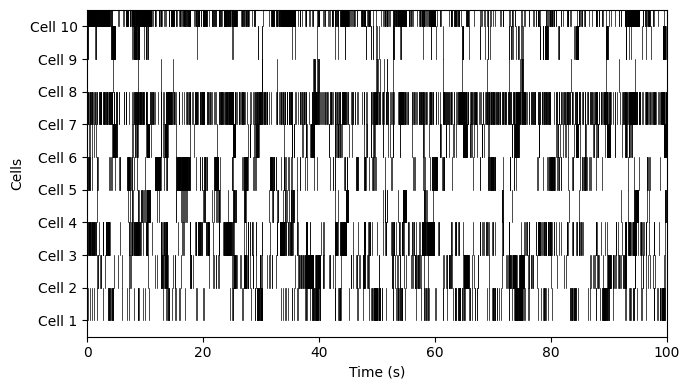

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive

drive.mount("/content/drive")  # Don't change this.

gdrivepath = "/content/drive/MyDrive/crcns_pvc3_cat_recordings"

datadir = gdrivepath + "/drifting_bar/spike_data"
stimdir = gdrivepath + "/drifting_bar/stimulus_data"

# Set up the data directories
datadir
stimdir

# Parameters
num_cells = 10  # Number of cells to plot
maxTime = 100  # Plot spikes up to 100 seconds

import os

# List all .spk files in the data directory
spk_files = [f for f in os.listdir(datadir) if f.endswith('.spk')]

# Sort the list if needed, or choose files based on a specific criterion
spk_files.sort()  # Optional: to ensure consistent order

num_cells = min(len(spk_files), 10)  # Number of cells to plot

plt.figure(figsize=(7, 4))
plt.gca().set_prop_cycle(None)  # To cycle through different colors

for cell_id in range(num_cells):
    # Open the spike file for the current cell
    file_path = os.path.join(datadir, spk_files[cell_id])
    with open(file_path, 'rb') as fileID:
        spkTime = np.fromfile(fileID, dtype=np.int64) * 1e-6  # Spike time in seconds

    # Read stimulus times and orientations (if needed)
    fileID = open(stimdir + '/drifting_bar.din', 'rb')
    temp = np.fromfile(fileID, dtype=np.int64)
    stimTime = temp[::2] * 1e-6  # Stimulus time in seconds
    stimIdx = temp[1::2]  # Stimulus condition index
    fileID.close()

    # Plot spike raster for the current cell
    temp = spkTime
    temp = temp[temp < maxTime]
    plt.plot(np.vstack([temp, temp]), np.vstack([np.ones(len(temp)) + cell_id, np.zeros(len(temp)) + cell_id]), 'k-', linewidth=0.5)

plt.ylim(-0.5, num_cells - 0.5)
plt.gca().set_yticks(np.arange(num_cells))
plt.gca().set_yticklabels([f'Cell {i+1}' for i in range(num_cells)])
plt.ylabel('Cells')
plt.xlim(0, maxTime)
plt.xlabel('Time (s)')

plt.tight_layout()
plt.show()


Part 2  - Questions a,b, and c answered through code. Output seen.
a] Average interval of drifting bar stimulus is 0.00624 seconds approx.
b] All orientations appear approximately 6400 times
c] Average inter-stimulus interval is 0.00624 seconds approx.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Average duration of a drifting bar stimulus: 0.006243394126685127 seconds
Orientation 0 appeared 6400 times
Orientation 1 appeared 6400 times
Orientation 2 appeared 6400 times
Orientation 3 appeared 6400 times
Orientation 4 appeared 6400 times
Orientation 5 appeared 6400 times
Orientation 6 appeared 6400 times
Orientation 7 appeared 6400 times
Orientation 8 appeared 6400 times
Orientation 9 appeared 6400 times
Orientation 10 appeared 6400 times
Orientation 11 appeared 6400 times
Orientation 12 appeared 6400 times
Orientation 13 appeared 6400 times
Orientation 14 appeared 6400 times
Orientation 15 appeared 6400 times
Orientation 16 appeared 6400 times
Orientation 17 appeared 6400 times
Average inter-stimulus interval: 0.006243394126685127 seconds


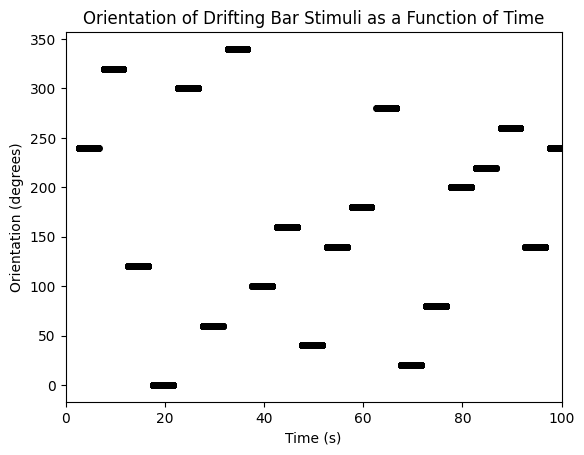

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount("/content/drive")
gdrivepath = "/content/drive/MyDrive/crcns_pvc3_cat_recordings"

datadir = gdrivepath + "/drifting_bar/spike_data"
stimdir = gdrivepath + "/drifting_bar/stimulus_data"

# Set up the data directories
datadir
stimdir

fileID = open(stimdir + '/drifting_bar.din', 'rb')
temp = np.fromfile(fileID, dtype=np.int64)
stimTime = temp[::2] * 1e-6  # Stimulus time in seconds
stimIdx = temp[1::2]  # Stimulus condition index

ori = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340]
maxTime = 100

# Convert stimulus condition index to orientation
valid_indices = np.where((stimIdx >= 0) & (stimIdx < len(ori)))[0]
stimOri = np.array([ori[idx] for idx in stimIdx[valid_indices]])

stim_durations = np.diff(stimTime)  # Time between consecutive stimulus presentations
average_duration = np.mean(stim_durations)  # Average duration of a stimulus
print(f"Average duration of a drifting bar stimulus: {average_duration} seconds")

unique_orientations, counts = np.unique(stimIdx, return_counts=True) # Number of repeats for each stimulus
for ori_idx, count in zip(unique_orientations, counts):
    print(f"Orientation {ori_idx} appeared {count} times")

inter_stimulus_intervals = stim_durations  # Already computed as the difference between stimulus times
average_interval = np.mean(inter_stimulus_intervals)
print(f"Average inter-stimulus interval: {average_interval} seconds")

orientation = [ori[idx] for idx in stimIdx]
plt.figure()
plt.step(stimTime[valid_indices], stimOri, 'k.', markersize=8)
plt.xlabel('Time (s)')
plt.ylabel('Orientation (degrees)')
plt.title('Orientation of Drifting Bar Stimuli as a Function of Time')
plt.xlim(0, 100)
plt.show()

Part 3  - PSTH for cell 1 and spike raster at 80 degrees oreintation.

Answer to question - The delay in onset of maximal spiking can be due to the difference in the receptive fileds of Cats and Monkeys. Cats have larger receptive fields compared to monekys as they are more adapted to seeing in the dark. Neurons respond maximally after the drifting bar is completely out of the receptive filed in the visual cortex. Thus, due to smaller and precise receptive fields along with other variables may have caused the difference in the maximal spiking time.  


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


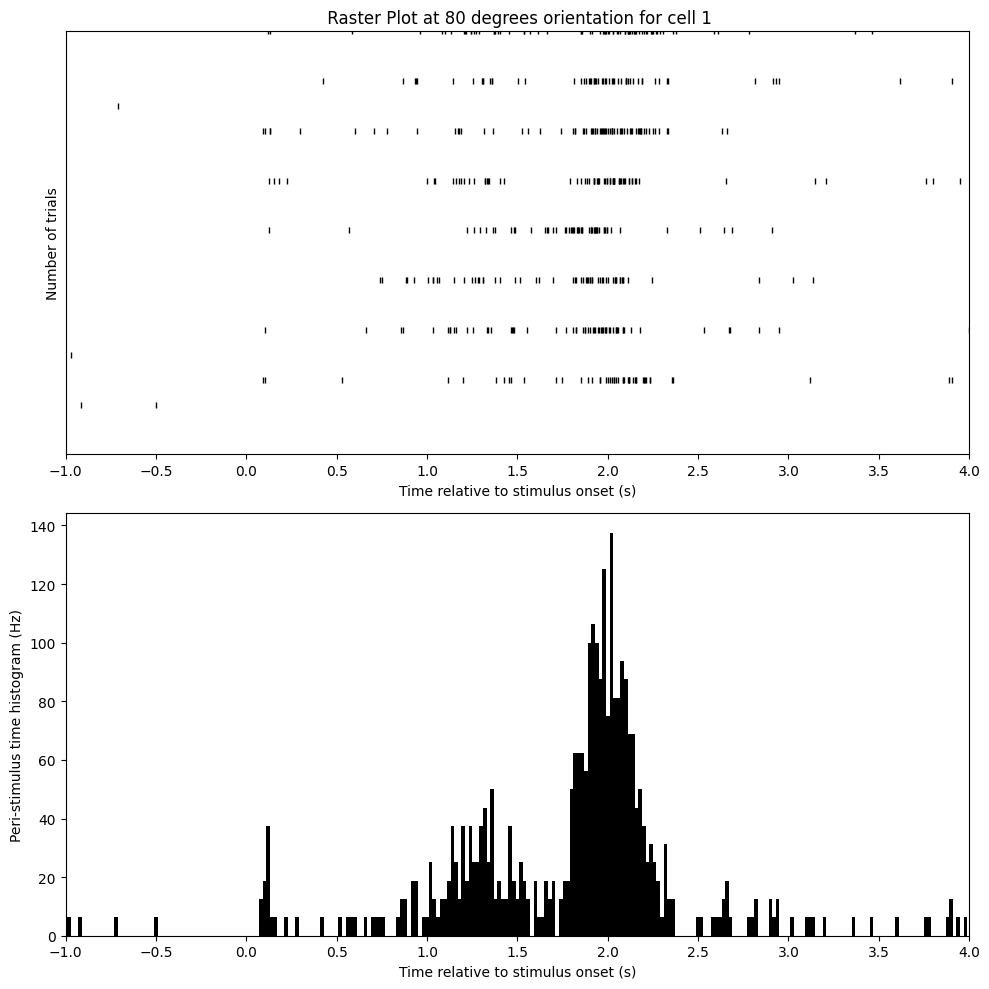

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount("/content/drive")
gdrivepath = "/content/drive/MyDrive/crcns_pvc3_cat_recordings"

datadir = gdrivepath + "/drifting_bar/spike_data"
stimdir = gdrivepath + "/drifting_bar/stimulus_data"

# Set up the data directories
datadir
stimdir

fileID = open(datadir + '/t00.spk', 'rb')
spkTime = np.fromfile(fileID, dtype=np.int64) * 1e-6  # Convert to seconds
fileID.close()

fileID = open(stimdir + '/drifting_bar.din', 'rb')
temp = np.fromfile(fileID, dtype=np.int64)
stimTime = temp[::2] * 1e-6  # Stimulus time in seconds
stimIdx = temp[1::2]  # Stimulus condition index

ori = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340]
maxTime = 100

valid_indices = np.where((stimIdx >= 0) & (stimIdx < len(ori)))[0]
stimOri = np.array([ori[idx] for idx in stimIdx[valid_indices]])

# Number of unique orientations
num_ori = len(np.unique(stimOri))


# Find out when each stimulus was presented
x = stimOri
runs = np.diff(np.concatenate(([0], np.where(np.diff(x) != 0)[0] + 1, [len(x)])))
values = x[np.concatenate(([0], np.where(np.diff(x) != 0)[0] + 1))]

stimStartTimes = {}
for j in range(len(ori)):
    presOrder = np.where(values == ori[j])[0]
    presTime = np.zeros_like(presOrder, dtype=float)
    for k in range(len(presOrder)):
        if presOrder[k] == 0:
            presTime[k] = stimTime[0]
        else:
            presTime[k] = stimTime[np.sum(runs[:presOrder[k]])]
    stimStartTimes[ori[j]] = presTime

# the cell spikes when stimulus of a particular orientation was presented
cells = {'spikeTimeByOri': {}}
for j in range(len(ori)):
    refTimes = stimStartTimes[ori[j]]
    cells['spikeTimeByOri'][ori[j]] = {'spkTimePre': [], 'spkTimePost': []}
    for k in range(len(refTimes)):
        temp = spkTime - refTimes[k]
        pre_stim = temp[(temp > -1) & (temp < 0)]
        post_stim = temp[(temp >= 0) & (temp < 4)]
        cells['spikeTimeByOri'][ori[j]]['spkTimePre'].append(pre_stim)
        cells['spikeTimeByOri'][ori[j]]['spkTimePost'].append(post_stim)

    spkTimePreAll = np.concatenate(cells['spikeTimeByOri'][ori[j]]['spkTimePre'])
    spkTimePostAll = np.concatenate(cells['spikeTimeByOri'][ori[j]]['spkTimePost'])
    cells['spikeTimeByOri'][ori[j]]['spkTimeAll'] = np.concatenate([spkTimePreAll, spkTimePostAll])
    cells['spikeTimeByOri'][ori[j]]['spkCounts'] = np.array([
        len(cells['spikeTimeByOri'][ori[j]]['spkTimePost'][i]) / 4 - len(cells['spikeTimeByOri'][ori[j]]['spkTimePre'][i])
        for i in range(len(refTimes))
    ])

# Plot peri-stimulus histogram for the 1st cell
oriToPlot = 80  # Orientation of 80 deg

plt.figure(figsize=(10, 10))

# Peri-stimulus raster plot
plt.subplot(2, 1, 1)
for j in range(len(cells['spikeTimeByOri'][oriToPlot]['spkTimePre'])):
    spkPre = cells['spikeTimeByOri'][oriToPlot]['spkTimePre'][j]
    spkPost = cells['spikeTimeByOri'][oriToPlot]['spkTimePost'][j]
    # Plot pre-stimulus spikes
    plt.plot(spkPre, np.full_like(spkPre, -2 * j), 'k|', markersize=5)
    # Plot post-stimulus spikes
    plt.plot(spkPost, np.full_like(spkPost, -2 * j + 1), 'k|', markersize=5)
plt.ylim([-2 * len(cells['spikeTimeByOri'][oriToPlot]['spkTimePre']), 1])
plt.yticks([])
plt.ylabel('Number of trials')
plt.xlim([-1, 4])
plt.xlabel('Time relative to stimulus onset (s)')
plt.title(' Raster Plot at 80 degrees orientation for cell 1')

# Set x-axis ticks with 0.5 second intervals
plt.xticks(np.arange(-1, 4.5, 0.5))

# Peri-stimulus time histogram
binWidth = 0.02
edges = np.arange(-1, 4 + binWidth, binWidth)
N, _ = np.histogram(cells['spikeTimeByOri'][oriToPlot]['spkTimeAll'], bins=edges)
plt.subplot(2, 1, 2)
plt.bar(edges[:-1], N / (len(cells['spikeTimeByOri'][oriToPlot]['spkTimePre']) * binWidth), width=binWidth, color='k')
plt.ylabel('Peri-stimulus time histogram (Hz)')
plt.xlim([-1, 4])
plt.xlabel('Time relative to stimulus onset (s)')
plt.xticks(np.arange(-1, 4.5, 0.5))  # Set x-axis ticks with 0.5 second intervals

plt.tight_layout()
plt.show()



Part 4 - The orientation selectivity for cell 1 is at 80 degrees.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


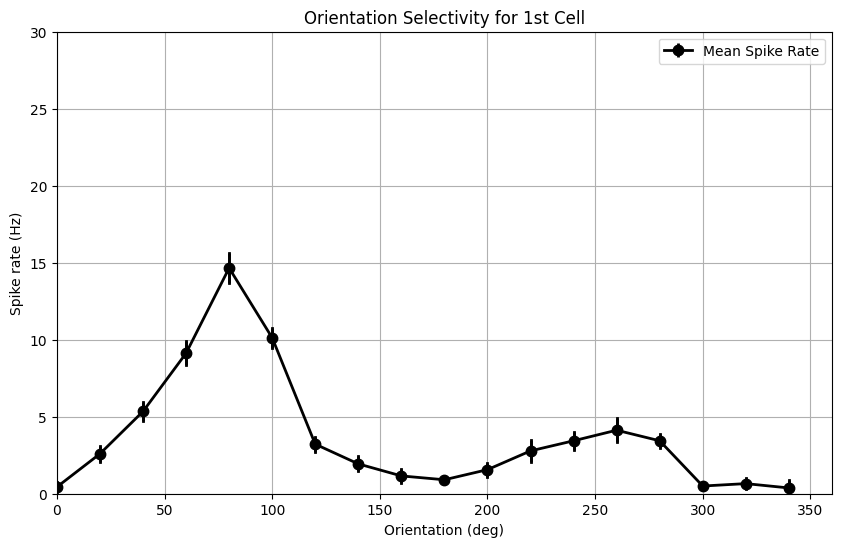

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount("/content/drive")
gdrivepath = "/content/drive/MyDrive/crcns_pvc3_cat_recordings"

datadir = gdrivepath + "/drifting_bar/spike_data"
stimdir = gdrivepath + "/drifting_bar/stimulus_data"

# Set up the data directories
datadir
stimdir
ori = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340]

fileID = open(datadir + '/t00.spk', 'rb')
spkTime = np.fromfile(fileID, dtype=np.int64) * 1e-6  # Convert to seconds
fileID.close()

fileID = open(stimdir + '/drifting_bar.din', 'rb')
temp = np.fromfile(fileID, dtype=np.int64)
stimTime = temp[::2] * 1e-6  # Stimulus time in seconds
stimIdx = temp[1::2]  # Stimulus condition index

ori = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340]
maxTime = 100

valid_indices = np.where((stimIdx >= 0) & (stimIdx < len(ori)))[0]
stimOri = np.array([ori[idx] for idx in stimIdx[valid_indices]])

# Number of unique orientations
num_ori = len(np.unique(stimOri))

stimStartTimes = {}
for j in range(len(ori)):
    presOrder = np.where(values == ori[j])[0]
    presTime = np.zeros_like(presOrder, dtype=float)
    for k in range(len(presOrder)):
        if presOrder[k] == 0:
            presTime[k] = stimTime[0]
        else:
            presTime[k] = stimTime[np.sum(runs[:presOrder[k]])]
    stimStartTimes[ori[j]] = presTime
# Find out when each stimulus was presented
x = stimOri
runs = np.diff(np.concatenate(([0], np.where(np.diff(x) != 0)[0] + 1, [len(x)])))
values = x[np.concatenate(([0], np.where(np.diff(x) != 0)[0] + 1))]
cells = {'spikeTimeByOri': {}}
cells = {'spikeTimeByOri': {}}
for j in range(len(ori)):
    refTimes = stimStartTimes[ori[j]]
    cells['spikeTimeByOri'][ori[j]] = {'spkTimePre': [], 'spkTimePost': []}
    for k in range(len(refTimes)):
        temp = spkTime - refTimes[k]
        pre_stim = temp[(temp > -1) & (temp < 0)]
        post_stim = temp[(temp >= 0) & (temp < 4)]
        cells['spikeTimeByOri'][ori[j]]['spkTimePre'].append(pre_stim)
        cells['spikeTimeByOri'][ori[j]]['spkTimePost'].append(post_stim)

    spkTimePreAll = np.concatenate(cells['spikeTimeByOri'][ori[j]]['spkTimePre'])
    spkTimePostAll = np.concatenate(cells['spikeTimeByOri'][ori[j]]['spkTimePost'])
    cells['spikeTimeByOri'][ori[j]]['spkTimeAll'] = np.concatenate([spkTimePreAll, spkTimePostAll])
    cells['spikeTimeByOri'][ori[j]]['spkCounts'] = np.array([
        len(cells['spikeTimeByOri'][ori[j]]['spkTimePost'][i]) / 4 - len(cells['spikeTimeByOri'][ori[j]]['spkTimePre'][i])
        for i in range(len(refTimes))
    ])
# Calculate orientation selectivity
spikeNumByOri = []
spikeNumSEMByOri = []
for j in range(len(ori)):
    spikeCounts = cells['spikeTimeByOri'][ori[j]]['spkCounts']
    spikeNumByOri.append(np.mean(spikeCounts))
    spikeNumSEMByOri.append(np.std(spikeCounts) / np.sqrt(len(spikeCounts)))
oriToPlot = 80

# Plot orientation selectivity
plt.figure(figsize=(10, 6))
plt.errorbar(ori, spikeNumByOri, yerr=spikeNumSEMByOri, fmt='k.-', markersize=15, linewidth=2, label='Mean Spike Rate')
for j in range(len(ori)):
    plt.plot([ori[j], ori[j]], [spikeNumByOri[j] - spikeNumSEMByOri[j], spikeNumByOri[j] + spikeNumSEMByOri[j]], 'k-', linewidth=2)
plt.xlabel('Orientation (deg)')
plt.ylabel('Spike rate (Hz)')
plt.xlim([0, 360])
plt.ylim([0, 30])
plt.title('Orientation Selectivity for 1st Cell')
plt.grid(True)
plt.legend()
plt.show()

Part 5 - Orientation tuning curve for cell 1 fitted with a double gaussian

Answers to questions found in code output -

- Preffered orientation - 80 degrees
- Orientation Selectivity Index (OSI): 0.5292619344795966
- Direction Selectivity Index (DSI): 0.4140293821726892
- Tuning Width (FWHM) for Gaussian 1: 64.12492546041345
- Tuning Width (FWHM) for Gaussian 2: 86.57703760762296
- Average Tuning Width: 75.3509815340182




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


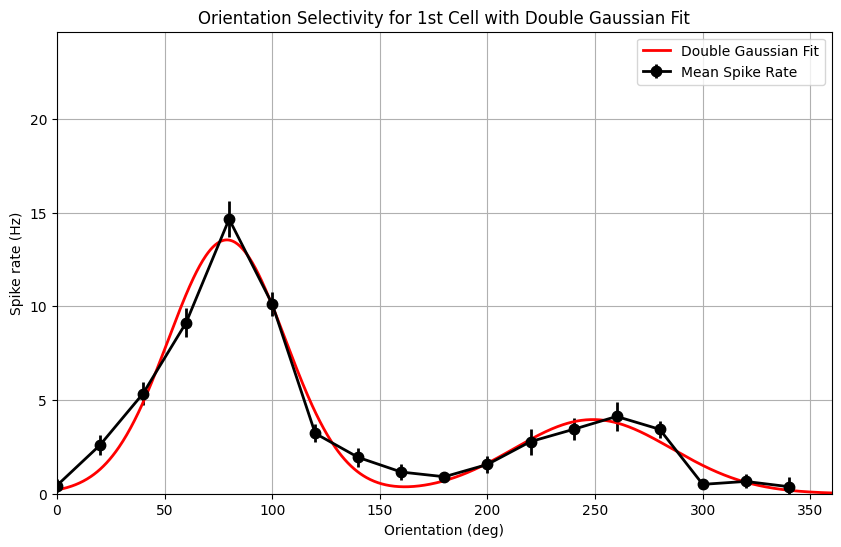

Preferred Orientation: 80
Orientation Selectivity Index (OSI): 0.5292619344795966
Direction Selectivity Index (DSI): 0.4140293821726892
Tuning Width (FWHM) for Gaussian 1: 64.12492546041345
Tuning Width (FWHM) for Gaussian 2: 86.57703760762296
Average Tuning Width: 75.3509815340182


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

from google.colab import drive
drive.mount("/content/drive")
gdrivepath = "/content/drive/MyDrive/crcns_pvc3_cat_recordings"

datadir = gdrivepath + "/drifting_bar/spike_data"
stimdir = gdrivepath + "/drifting_bar/stimulus_data"

# Set up the data directories
datadir
stimdir

spikeNumByOri = []
spikeNumSEMByOri = []
for j in range(len(ori)):
    spikeCounts = cells['spikeTimeByOri'][ori[j]]['spkCounts']
    spikeNumByOri.append(np.mean(spikeCounts))
    spikeNumSEMByOri.append(np.std(spikeCounts) / np.sqrt(len(spikeCounts)))
def double_gaussian(x, A1, mu1, sigma1, A2, mu2, sigma2):
    return (A1 * np.exp(-((x - mu1) ** 2) / (2 * sigma1 ** 2)) +
            A2 * np.exp(-((x - mu2) ** 2) / (2 * sigma2 ** 2)))

# Fit the double Gaussian to the data
initial_params = [max(spikeNumByOri), 0, 45, max(spikeNumByOri) / 2, 180, 45]  # Initial guess
params, params_covariance = curve_fit(double_gaussian, ori, spikeNumByOri, p0=initial_params)

# Generate x values for the fitted curve
x_fit = np.linspace(0, 360, 1000)
y_fit = double_gaussian(x_fit, *params)

# Plot orientation selectivity
plt.figure(figsize=(10, 6))
plt.errorbar(ori, spikeNumByOri, yerr=spikeNumSEMByOri, fmt='k.-', markersize=15, linewidth=2, label='Mean Spike Rate')
plt.plot(x_fit, y_fit, 'r-', linewidth=2, label='Double Gaussian Fit')
plt.xlabel('Orientation (deg)')
plt.ylabel('Spike rate (Hz)')
plt.xlim([0, 360])
plt.ylim([0, max(spikeNumByOri) + 10])
plt.title('Orientation Selectivity for 1st Cell with Double Gaussian Fit')
plt.grid(True)
plt.legend()
plt.show()

# Compute the preferred orientation
preferred_orientation = ori[np.argmax(spikeNumByOri)]
print("Preferred Orientation:", preferred_orientation)

# ------------------------
# Orientation Selectivity Index (OSI)
# Convert orientations to radians
theta_rad = np.deg2rad(ori)

# Compute the OSI
complex_sum = np.sum(spikeNumByOri * np.exp(2j * theta_rad))
OSI = np.abs(complex_sum) / np.sum(spikeNumByOri)
print("Orientation Selectivity Index (OSI):", OSI)

# ------------------------
# Direction Selectivity Index (DSI)
# Compute the DSI
complex_sum_direction = np.sum(spikeNumByOri * np.exp(1j * theta_rad))
DSI = np.abs(complex_sum_direction) / np.sum(spikeNumByOri)
print("Direction Selectivity Index (DSI):", DSI)

# ------------------------
# Tuning width (FWHM) based on the Gaussian fits
# Extracting the sigma values from the fitted parameters
sigma1 = params[2]  # sigma1 from the fit
sigma2 = params[5]  # sigma2 from the fit

# Tuning width (FWHM) for both Gaussians
FWHM1 = 2.355 * sigma1
FWHM2 = 2.355 * sigma2

# Average of the tuning widths
average_tuning_width = (FWHM1 + FWHM2) / 2
print("Tuning Width (FWHM) for Gaussian 1:", FWHM1)
print("Tuning Width (FWHM) for Gaussian 2:", FWHM2)
print("Average Tuning Width:", average_tuning_width)

Part 6 - Couldn't do it in a single code, so I have repeated the same code format over 10 cells, with interval time of 1 seconds.



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


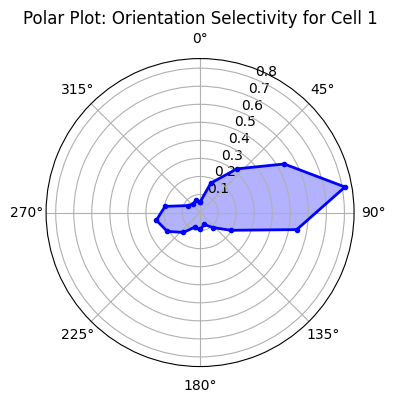

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Mount Google Drive to access the files
from google.colab import drive
drive.mount("/content/drive")
gdrivepath = "/content/drive/MyDrive/crcns_pvc3_cat_recordings"

datadir = gdrivepath + "/drifting_bar/spike_data"
stimdir = gdrivepath + "/drifting_bar/stimulus_data"

# Load spike times for one neuron
def load_spike_data(filename):
    with open(filename, 'rb') as fileID:
        spkTime = np.fromfile(fileID, dtype=np.int64) * 1e-6  # Convert to seconds
    return spkTime

# Load stimulus data
def load_stimulus_data(filename):
    with open(filename, 'rb') as fileID:
        temp = np.fromfile(fileID, dtype=np.int64)
        stimTime = temp[::2] * 1e-6  # Stimulus time in seconds
        stimIdx = temp[1::2]         # Stimulus condition index
    return stimTime, stimIdx

# Load data
spkTime = load_spike_data(datadir + '/t00.spk')
stimTime, stimIdx = load_stimulus_data(stimdir + '/drifting_bar.din')

# Define orientations and valid stimulus indices
ori = np.array([0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340])
valid_indices = np.where((stimIdx >= 0) & (stimIdx < len(ori)))[0]
stimOri = np.array([ori[idx] for idx in stimIdx[valid_indices]])

# Compute spike counts for each orientation
spike_counts = np.zeros(len(ori))
for i, orientation in enumerate(ori):
    stim_times = stimTime[stimOri == orientation]  # Find stimulus times for this orientation
    for stim in stim_times:
        spikes_in_window = spkTime[(spkTime >= stim) & (spkTime <= stim + 1)]  # 1-second window
        spike_counts[i] += len(spikes_in_window)

# Convert to firing rates
firing_rate = spike_counts / len(stimTime)  # Normalize by number of stimuli

# Convert orientation to radians for polar plot
orientations_rad = np.deg2rad(np.append(ori, ori[0]))
firing_rate = np.append(firing_rate, firing_rate[0])  # Close the circle

# Plot the polar plot
plt.figure(figsize=(4, 4))
ax = plt.subplot(111, projection='polar')
ax.plot(orientations_rad, firing_rate, 'b.-', markersize=6, linewidth=2)
ax.fill(orientations_rad, firing_rate, 'b', alpha=0.3)

# Formatting
ax.set_theta_zero_location('N')  # 0 degrees at the top
ax.set_theta_direction(-1)       # Clockwise direction
ax.set_title('Polar Plot: Orientation Selectivity for Cell 1')

plt.show()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


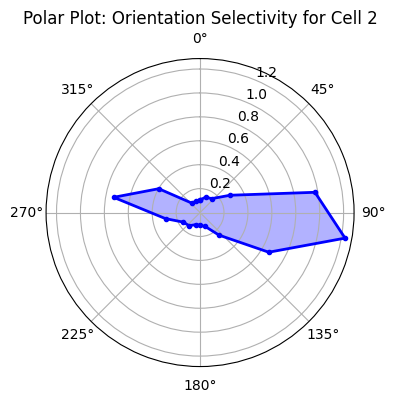

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Mount Google Drive to access the files
from google.colab import drive
drive.mount("/content/drive")
gdrivepath = "/content/drive/MyDrive/crcns_pvc3_cat_recordings"

datadir = gdrivepath + "/drifting_bar/spike_data"
stimdir = gdrivepath + "/drifting_bar/stimulus_data"

# Load spike times for one neuron
def load_spike_data(filename):
    with open(filename, 'rb') as fileID:
        spkTime = np.fromfile(fileID, dtype=np.int64) * 1e-6  # Convert to seconds
    return spkTime

# Load stimulus data
def load_stimulus_data(filename):
    with open(filename, 'rb') as fileID:
        temp = np.fromfile(fileID, dtype=np.int64)
        stimTime = temp[::2] * 1e-6  # Stimulus time in seconds
        stimIdx = temp[1::2]         # Stimulus condition index
    return stimTime, stimIdx

# Load data
spkTime = load_spike_data(datadir + '/t02.spk')
stimTime, stimIdx = load_stimulus_data(stimdir + '/drifting_bar.din')

# Define orientations and valid stimulus indices
ori = np.array([0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340])
valid_indices = np.where((stimIdx >= 0) & (stimIdx < len(ori)))[0]
stimOri = np.array([ori[idx] for idx in stimIdx[valid_indices]])

# Compute spike counts for each orientation
spike_counts = np.zeros(len(ori))
for i, orientation in enumerate(ori):
    stim_times = stimTime[stimOri == orientation]  # Find stimulus times for this orientation
    for stim in stim_times:
        spikes_in_window = spkTime[(spkTime >= stim) & (spkTime <= stim + 1)]
        spike_counts[i] += len(spikes_in_window)

# Convert to firing rates
firing_rate = spike_counts / len(stimTime)  # Normalize by number of stimuli

# Convert orientation to radians for polar plot
orientations_rad = np.deg2rad(np.append(ori, ori[0]))
firing_rate = np.append(firing_rate, firing_rate[0])  # Close the circle

# Plot the polar plot
plt.figure(figsize=(4, 4))
ax = plt.subplot(111, projection='polar')
ax.plot(orientations_rad, firing_rate, 'b.-', markersize=6, linewidth=2)
ax.fill(orientations_rad, firing_rate, 'b', alpha=0.3)

# Formatting
ax.set_theta_zero_location('N')  # 0 degrees at the top
ax.set_theta_direction(-1)       # Clockwise direction
ax.set_title('Polar Plot: Orientation Selectivity for Cell 2')

plt.show()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


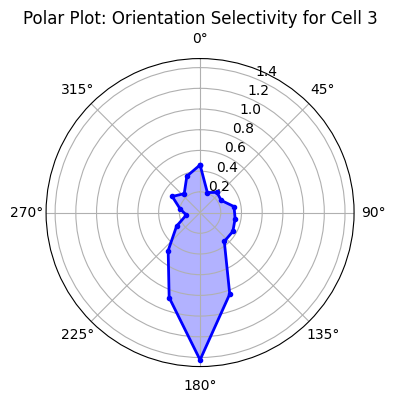

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Mount Google Drive to access the files
from google.colab import drive
drive.mount("/content/drive")
gdrivepath = "/content/drive/MyDrive/crcns_pvc3_cat_recordings"

datadir = gdrivepath + "/drifting_bar/spike_data"
stimdir = gdrivepath + "/drifting_bar/stimulus_data"

# Load spike times for one neuron
def load_spike_data(filename):
    with open(filename, 'rb') as fileID:
        spkTime = np.fromfile(fileID, dtype=np.int64) * 1e-6  # Convert to seconds
    return spkTime

# Load stimulus data
def load_stimulus_data(filename):
    with open(filename, 'rb') as fileID:
        temp = np.fromfile(fileID, dtype=np.int64)
        stimTime = temp[::2] * 1e-6  # Stimulus time in seconds
        stimIdx = temp[1::2]         # Stimulus condition index
    return stimTime, stimIdx

# Load data
spkTime = load_spike_data(datadir + '/t04.spk')
stimTime, stimIdx = load_stimulus_data(stimdir + '/drifting_bar.din')

# Define orientations and valid stimulus indices
ori = np.array([0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340])
valid_indices = np.where((stimIdx >= 0) & (stimIdx < len(ori)))[0]
stimOri = np.array([ori[idx] for idx in stimIdx[valid_indices]])

# Compute spike counts for each orientation
spike_counts = np.zeros(len(ori))
for i, orientation in enumerate(ori):
    stim_times = stimTime[stimOri == orientation]  # Find stimulus times for this orientation
    for stim in stim_times:
        spikes_in_window = spkTime[(spkTime >= stim) & (spkTime <= stim + 1)]
        spike_counts[i] += len(spikes_in_window)

# Convert to firing rates
firing_rate = spike_counts / len(stimTime)  # Normalize by number of stimuli

# Convert orientation to radians for polar plot
orientations_rad = np.deg2rad(np.append(ori, ori[0]))
firing_rate = np.append(firing_rate, firing_rate[0])  # Close the circle

# Plot the polar plot
plt.figure(figsize=(4, 4))
ax = plt.subplot(111, projection='polar')
ax.plot(orientations_rad, firing_rate, 'b.-', markersize=6, linewidth=2)
ax.fill(orientations_rad, firing_rate, 'b', alpha=0.3)

# Formatting
ax.set_theta_zero_location('N')  # 0 degrees at the top
ax.set_theta_direction(-1)       # Clockwise direction
ax.set_title('Polar Plot: Orientation Selectivity for Cell 3')

plt.show()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


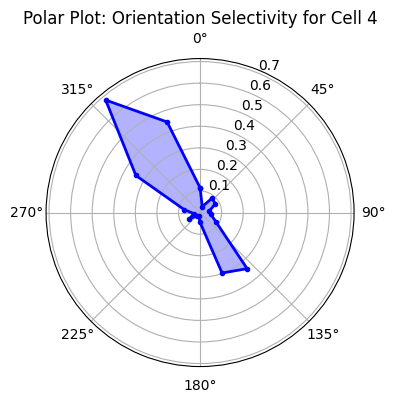

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Mount Google Drive to access the files
from google.colab import drive
drive.mount("/content/drive")
gdrivepath = "/content/drive/MyDrive/crcns_pvc3_cat_recordings"

datadir = gdrivepath + "/drifting_bar/spike_data"
stimdir = gdrivepath + "/drifting_bar/stimulus_data"

# Load spike times for one neuron
def load_spike_data(filename):
    with open(filename, 'rb') as fileID:
        spkTime = np.fromfile(fileID, dtype=np.int64) * 1e-6  # Convert to seconds
    return spkTime

# Load stimulus data
def load_stimulus_data(filename):
    with open(filename, 'rb') as fileID:
        temp = np.fromfile(fileID, dtype=np.int64)
        stimTime = temp[::2] * 1e-6  # Stimulus time in seconds
        stimIdx = temp[1::2]         # Stimulus condition index
    return stimTime, stimIdx

# Load data
spkTime = load_spike_data(datadir + '/t08.spk')
stimTime, stimIdx = load_stimulus_data(stimdir + '/drifting_bar.din')

# Define orientations and valid stimulus indices
ori = np.array([0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340])
valid_indices = np.where((stimIdx >= 0) & (stimIdx < len(ori)))[0]
stimOri = np.array([ori[idx] for idx in stimIdx[valid_indices]])

# Compute spike counts for each orientation
spike_counts = np.zeros(len(ori))
for i, orientation in enumerate(ori):
    stim_times = stimTime[stimOri == orientation]  # Find stimulus times for this orientation
    for stim in stim_times:
        spikes_in_window = spkTime[(spkTime >= stim) & (spkTime <= stim + 1)]
        spike_counts[i] += len(spikes_in_window)

# Convert to firing rates
firing_rate = spike_counts / len(stimTime)  # Normalize by number of stimuli

# Convert orientation to radians for polar plot
orientations_rad = np.deg2rad(np.append(ori, ori[0]))
firing_rate = np.append(firing_rate, firing_rate[0])  # Close the circle

# Plot the polar plot
plt.figure(figsize=(4, 4))
ax = plt.subplot(111, projection='polar')
ax.plot(orientations_rad, firing_rate, 'b.-', markersize=6, linewidth=2)
ax.fill(orientations_rad, firing_rate, 'b', alpha=0.3)

# Formatting
ax.set_theta_zero_location('N')  # 0 degrees at the top
ax.set_theta_direction(-1)       # Clockwise direction
ax.set_title('Polar Plot: Orientation Selectivity for Cell 4')

plt.show()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


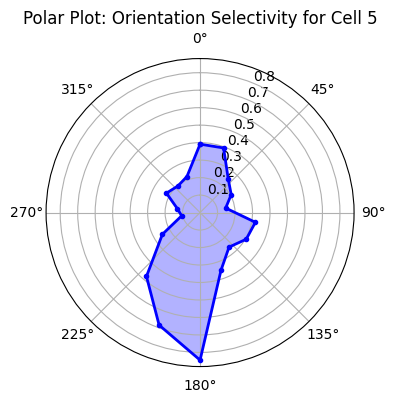

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Mount Google Drive to access the files
from google.colab import drive
drive.mount("/content/drive")
gdrivepath = "/content/drive/MyDrive/crcns_pvc3_cat_recordings"

datadir = gdrivepath + "/drifting_bar/spike_data"
stimdir = gdrivepath + "/drifting_bar/stimulus_data"

# Load spike times for one neuron
def load_spike_data(filename):
    with open(filename, 'rb') as fileID:
        spkTime = np.fromfile(fileID, dtype=np.int64) * 1e-6  # Convert to seconds
    return spkTime

# Load stimulus data
def load_stimulus_data(filename):
    with open(filename, 'rb') as fileID:
        temp = np.fromfile(fileID, dtype=np.int64)
        stimTime = temp[::2] * 1e-6  # Stimulus time in seconds
        stimIdx = temp[1::2]         # Stimulus condition index
    return stimTime, stimIdx

# Load data
spkTime = load_spike_data(datadir + '/t10.spk')
stimTime, stimIdx = load_stimulus_data(stimdir + '/drifting_bar.din')

# Define orientations and valid stimulus indices
ori = np.array([0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340])
valid_indices = np.where((stimIdx >= 0) & (stimIdx < len(ori)))[0]
stimOri = np.array([ori[idx] for idx in stimIdx[valid_indices]])

# Compute spike counts for each orientation
spike_counts = np.zeros(len(ori))
for i, orientation in enumerate(ori):
    stim_times = stimTime[stimOri == orientation]  # Find stimulus times for this orientation
    for stim in stim_times:
        spikes_in_window = spkTime[(spkTime >= stim) & (spkTime <= stim + 1)]
        spike_counts[i] += len(spikes_in_window)

# Convert to firing rates
firing_rate = spike_counts / len(stimTime)  # Normalize by number of stimuli

# Convert orientation to radians for polar plot
orientations_rad = np.deg2rad(np.append(ori, ori[0]))
firing_rate = np.append(firing_rate, firing_rate[0])  # Close the circle

# Plot the polar plot
plt.figure(figsize=(4, 4))
ax = plt.subplot(111, projection='polar')
ax.plot(orientations_rad, firing_rate, 'b.-', markersize=6, linewidth=2)
ax.fill(orientations_rad, firing_rate, 'b', alpha=0.3)

# Formatting
ax.set_theta_zero_location('N')  # 0 degrees at the top
ax.set_theta_direction(-1)       # Clockwise direction
ax.set_title('Polar Plot: Orientation Selectivity for Cell 5')

plt.show()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


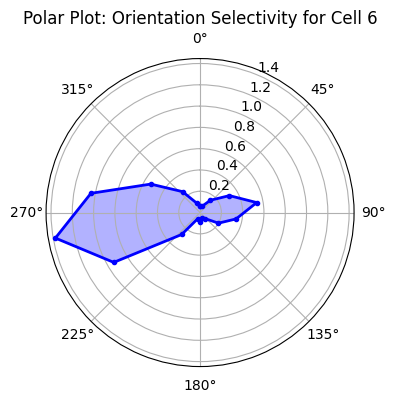

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Mount Google Drive to access the files
from google.colab import drive
drive.mount("/content/drive")
gdrivepath = "/content/drive/MyDrive/crcns_pvc3_cat_recordings"

datadir = gdrivepath + "/drifting_bar/spike_data"
stimdir = gdrivepath + "/drifting_bar/stimulus_data"

# Load spike times for one neuron
def load_spike_data(filename):
    with open(filename, 'rb') as fileID:
        spkTime = np.fromfile(fileID, dtype=np.int64) * 1e-6  # Convert to seconds
    return spkTime

# Load stimulus data
def load_stimulus_data(filename):
    with open(filename, 'rb') as fileID:
        temp = np.fromfile(fileID, dtype=np.int64)
        stimTime = temp[::2] * 1e-6  # Stimulus time in seconds
        stimIdx = temp[1::2]         # Stimulus condition index
    return stimTime, stimIdx

# Load data
spkTime = load_spike_data(datadir + '/t18.spk')
stimTime, stimIdx = load_stimulus_data(stimdir + '/drifting_bar.din')

# Define orientations and valid stimulus indices
ori = np.array([0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340])
valid_indices = np.where((stimIdx >= 0) & (stimIdx < len(ori)))[0]
stimOri = np.array([ori[idx] for idx in stimIdx[valid_indices]])

# Compute spike counts for each orientation
spike_counts = np.zeros(len(ori))
for i, orientation in enumerate(ori):
    stim_times = stimTime[stimOri == orientation]  # Find stimulus times for this orientation
    for stim in stim_times:
        spikes_in_window = spkTime[(spkTime >= stim) & (spkTime <= stim + 1)]
        spike_counts[i] += len(spikes_in_window)

# Convert to firing rates
firing_rate = spike_counts / len(stimTime)  # Normalize by number of stimuli

# Convert orientation to radians for polar plot
orientations_rad = np.deg2rad(np.append(ori, ori[0]))
firing_rate = np.append(firing_rate, firing_rate[0])  # Close the circle

# Plot the polar plot
plt.figure(figsize=(4, 4))
ax = plt.subplot(111, projection='polar')
ax.plot(orientations_rad, firing_rate, 'b.-', markersize=6, linewidth=2)
ax.fill(orientations_rad, firing_rate, 'b', alpha=0.3)

# Formatting
ax.set_theta_zero_location('N')  # 0 degrees at the top
ax.set_theta_direction(-1)       # Clockwise direction
ax.set_title('Polar Plot: Orientation Selectivity for Cell 6')

plt.show()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


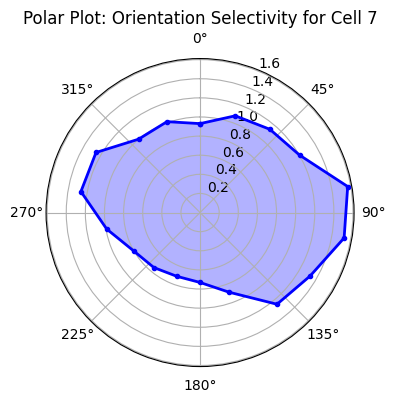

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Mount Google Drive to access the files
from google.colab import drive
drive.mount("/content/drive")
gdrivepath = "/content/drive/MyDrive/crcns_pvc3_cat_recordings"

datadir = gdrivepath + "/drifting_bar/spike_data"
stimdir = gdrivepath + "/drifting_bar/stimulus_data"

# Load spike times for one neuron
def load_spike_data(filename):
    with open(filename, 'rb') as fileID:
        spkTime = np.fromfile(fileID, dtype=np.int64) * 1e-6  # Convert to seconds
    return spkTime

# Load stimulus data
def load_stimulus_data(filename):
    with open(filename, 'rb') as fileID:
        temp = np.fromfile(fileID, dtype=np.int64)
        stimTime = temp[::2] * 1e-6  # Stimulus time in seconds
        stimIdx = temp[1::2]         # Stimulus condition index
    return stimTime, stimIdx

# Load data
spkTime = load_spike_data(datadir + '/t23.spk')
stimTime, stimIdx = load_stimulus_data(stimdir + '/drifting_bar.din')

# Define orientations and valid stimulus indices
ori = np.array([0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340])
valid_indices = np.where((stimIdx >= 0) & (stimIdx < len(ori)))[0]
stimOri = np.array([ori[idx] for idx in stimIdx[valid_indices]])

# Compute spike counts for each orientation
spike_counts = np.zeros(len(ori))
for i, orientation in enumerate(ori):
    stim_times = stimTime[stimOri == orientation]  # Find stimulus times for this orientation
    for stim in stim_times:
        spikes_in_window = spkTime[(spkTime >= stim) & (spkTime <= stim + 1)]
        spike_counts[i] += len(spikes_in_window)

# Convert to firing rates
firing_rate = spike_counts / len(stimTime)  # Normalize by number of stimuli

# Convert orientation to radians for polar plot
orientations_rad = np.deg2rad(np.append(ori, ori[0]))
firing_rate = np.append(firing_rate, firing_rate[0])  # Close the circle

# Plot the polar plot
plt.figure(figsize=(4, 4))
ax = plt.subplot(111, projection='polar')
ax.plot(orientations_rad, firing_rate, 'b.-', markersize=6, linewidth=2)
ax.fill(orientations_rad, firing_rate, 'b', alpha=0.3)

# Formatting
ax.set_theta_zero_location('N')  # 0 degrees at the top
ax.set_theta_direction(-1)       # Clockwise direction
ax.set_title('Polar Plot: Orientation Selectivity for Cell 7')

plt.show()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


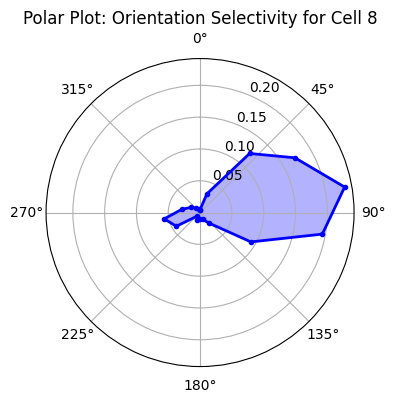

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Mount Google Drive to access the files
from google.colab import drive
drive.mount("/content/drive")
gdrivepath = "/content/drive/MyDrive/crcns_pvc3_cat_recordings"

datadir = gdrivepath + "/drifting_bar/spike_data"
stimdir = gdrivepath + "/drifting_bar/stimulus_data"

# Load spike times for one neuron
def load_spike_data(filename):
    with open(filename, 'rb') as fileID:
        spkTime = np.fromfile(fileID, dtype=np.int64) * 1e-6  # Convert to seconds
    return spkTime

# Load stimulus data
def load_stimulus_data(filename):
    with open(filename, 'rb') as fileID:
        temp = np.fromfile(fileID, dtype=np.int64)
        stimTime = temp[::2] * 1e-6  # Stimulus time in seconds
        stimIdx = temp[1::2]         # Stimulus condition index
    return stimTime, stimIdx

# Load data
spkTime = load_spike_data(datadir + '/t25.spk')
stimTime, stimIdx = load_stimulus_data(stimdir + '/drifting_bar.din')

# Define orientations and valid stimulus indices
ori = np.array([0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340])
valid_indices = np.where((stimIdx >= 0) & (stimIdx < len(ori)))[0]
stimOri = np.array([ori[idx] for idx in stimIdx[valid_indices]])

# Compute spike counts for each orientation
spike_counts = np.zeros(len(ori))
for i, orientation in enumerate(ori):
    stim_times = stimTime[stimOri == orientation]  # Find stimulus times for this orientation
    for stim in stim_times:
        spikes_in_window = spkTime[(spkTime >= stim) & (spkTime <= stim + 1)]
        spike_counts[i] += len(spikes_in_window)

# Convert to firing rates
firing_rate = spike_counts / len(stimTime)  # Normalize by number of stimuli

# Convert orientation to radians for polar plot
orientations_rad = np.deg2rad(np.append(ori, ori[0]))
firing_rate = np.append(firing_rate, firing_rate[0])  # Close the circle

# Plot the polar plot
plt.figure(figsize=(4, 4))
ax = plt.subplot(111, projection='polar')
ax.plot(orientations_rad, firing_rate, 'b.-', markersize=6, linewidth=2)
ax.fill(orientations_rad, firing_rate, 'b', alpha=0.3)

# Formatting
ax.set_theta_zero_location('N')  # 0 degrees at the top
ax.set_theta_direction(-1)       # Clockwise direction
ax.set_title('Polar Plot: Orientation Selectivity for Cell 8')

plt.show()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


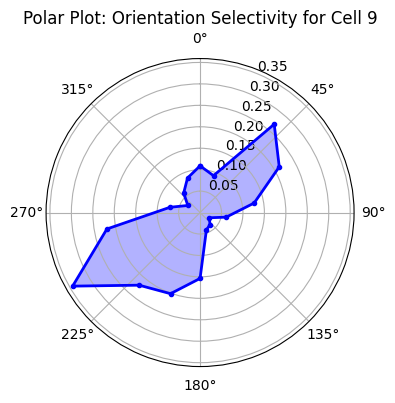

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Mount Google Drive to access the files
from google.colab import drive
drive.mount("/content/drive")
gdrivepath = "/content/drive/MyDrive/crcns_pvc3_cat_recordings"

datadir = gdrivepath + "/drifting_bar/spike_data"
stimdir = gdrivepath + "/drifting_bar/stimulus_data"

# Load spike times for one neuron
def load_spike_data(filename):
    with open(filename, 'rb') as fileID:
        spkTime = np.fromfile(fileID, dtype=np.int64) * 1e-6  # Convert to seconds
    return spkTime

# Load stimulus data
def load_stimulus_data(filename):
    with open(filename, 'rb') as fileID:
        temp = np.fromfile(fileID, dtype=np.int64)
        stimTime = temp[::2] * 1e-6  # Stimulus time in seconds
        stimIdx = temp[1::2]         # Stimulus condition index
    return stimTime, stimIdx

# Load data
spkTime = load_spike_data(datadir + '/t26.spk')
stimTime, stimIdx = load_stimulus_data(stimdir + '/drifting_bar.din')

# Define orientations and valid stimulus indices
ori = np.array([0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340])
valid_indices = np.where((stimIdx >= 0) & (stimIdx < len(ori)))[0]
stimOri = np.array([ori[idx] for idx in stimIdx[valid_indices]])

# Compute spike counts for each orientation
spike_counts = np.zeros(len(ori))
for i, orientation in enumerate(ori):
    stim_times = stimTime[stimOri == orientation]  # Find stimulus times for this orientation
    for stim in stim_times:
        spikes_in_window = spkTime[(spkTime >= stim) & (spkTime <= stim + 1)]
        spike_counts[i] += len(spikes_in_window)

# Convert to firing rates
firing_rate = spike_counts / len(stimTime)  # Normalize by number of stimuli

# Convert orientation to radians for polar plot
orientations_rad = np.deg2rad(np.append(ori, ori[0]))
firing_rate = np.append(firing_rate, firing_rate[0])  # Close the circle

# Plot the polar plot
plt.figure(figsize=(4, 4))
ax = plt.subplot(111, projection='polar')
ax.plot(orientations_rad, firing_rate, 'b.-', markersize=6, linewidth=2)
ax.fill(orientations_rad, firing_rate, 'b', alpha=0.3)

# Formatting
ax.set_theta_zero_location('N')  # 0 degrees at the top
ax.set_theta_direction(-1)       # Clockwise direction
ax.set_title('Polar Plot: Orientation Selectivity for Cell 9')

plt.show()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


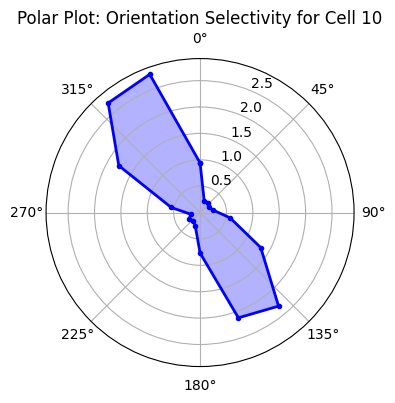

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Mount Google Drive to access the files
from google.colab import drive
drive.mount("/content/drive")
gdrivepath = "/content/drive/MyDrive/crcns_pvc3_cat_recordings"

datadir = gdrivepath + "/drifting_bar/spike_data"
stimdir = gdrivepath + "/drifting_bar/stimulus_data"

# Load spike times for one neuron
def load_spike_data(filename):
    with open(filename, 'rb') as fileID:
        spkTime = np.fromfile(fileID, dtype=np.int64) * 1e-6  # Convert to seconds
    return spkTime

# Load stimulus data
def load_stimulus_data(filename):
    with open(filename, 'rb') as fileID:
        temp = np.fromfile(fileID, dtype=np.int64)
        stimTime = temp[::2] * 1e-6  # Stimulus time in seconds
        stimIdx = temp[1::2]         # Stimulus condition index
    return stimTime, stimIdx

# Load data
spkTime = load_spike_data(datadir + '/t27.spk')
stimTime, stimIdx = load_stimulus_data(stimdir + '/drifting_bar.din')

# Define orientations and valid stimulus indices
ori = np.array([0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340])
valid_indices = np.where((stimIdx >= 0) & (stimIdx < len(ori)))[0]
stimOri = np.array([ori[idx] for idx in stimIdx[valid_indices]])

# Compute spike counts for each orientation
spike_counts = np.zeros(len(ori))
for i, orientation in enumerate(ori):
    stim_times = stimTime[stimOri == orientation]  # Find stimulus times for this orientation
    for stim in stim_times:
        spikes_in_window = spkTime[(spkTime >= stim) & (spkTime <= stim + 1)]
        spike_counts[i] += len(spikes_in_window)

# Convert to firing rates
firing_rate = spike_counts / len(stimTime)  # Normalize by number of stimuli

# Convert orientation to radians for polar plot
orientations_rad = np.deg2rad(np.append(ori, ori[0]))
firing_rate = np.append(firing_rate, firing_rate[0])  # Close the circle

# Plot the polar plot
plt.figure(figsize=(4, 4))
ax = plt.subplot(111, projection='polar')
ax.plot(orientations_rad, firing_rate, 'b.-', markersize=6, linewidth=2)
ax.fill(orientations_rad, firing_rate, 'b', alpha=0.3)

# Formatting
ax.set_theta_zero_location('N')  # 0 degrees at the top
ax.set_theta_direction(-1)       # Clockwise direction
ax.set_title('Polar Plot: Orientation Selectivity for Cell 10')

plt.show()

